let's. let's just get everything that actually goes into the thesis into the same document. I am very disorganized and confused 

hopefully when everything finishes  training I can just "run all" this guy and be done

spoiler alert it wasn't the last batch of results but now this one is. because even if they're a train wreck I won't have time to remake anything, so, for better or worse, this is the last fucking results notebook

^^^ lol, always a comedian, aren't I. remaking the old results to be prettier, new ones are pissing me off, we're sticking with the old ones

and now borrowing this for some testing re: predictions for whole dataset (10/5)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import results as r
import numpy as np
from PIL import Image
import glob
import random

### define stuff, set up

In [2]:
def file_order(fname): #for sorting glob'ed lists of files from output directories to match the file list csv's
    return(int(fname.split('/')[-2]))

def unnorm(og_img, normed_img):
    
    un= normed_img*np.std(og_img)
    un=un+np.mean(og_img)

    #fits_scaled=un/255
    #fits_scaled=fits_scaled*2*2550
    #fits_scaled=fits_scaled-2550
    
    return(un)

def setup(model_name, new=True, south=False):
    location='/home/zenalisa/data/output/'+model_name #check this if no files found
    #if '1hem' in model_name:
    #    south=True
    #signal=location+'/signal.tiff'
    #target=location+'/target.tiff'
    #prediction=location+'/prediction_smallrun_1131.tiff'

    target_path = location+'/*/target.tiff'
    signal_path = location+'/*/signal.tiff'
    #prediction_path = location+'/*/prediction_'+model_name+'.tiff'
    #print(prediction_path)
    prediction_path= location+'/*/prediction_*.tiff'
    

    target_list = glob.glob(target_path)
    target_list.sort(key=file_order)
    signal_list = glob.glob(signal_path)
    signal_list.sort(key=file_order)
    prediction_list = glob.glob(prediction_path)
    prediction_list.sort(key=file_order)
    print(len(prediction_list))
    
    target_list_new=[]
    prediction_list_new=[]
    signal_list_new=[]
    
    if new:
        location_new=location+'/new'
        if south:
            location_new=location+'/south'
        target_path_new = location_new+'/*/target.tiff'
        signal_path_new = location_new+'/*/signal.tiff'
        #prediction_path_new = location_new+'/*/prediction_'+model_name+'.tiff'
        prediction_path_new= location_new+'/*/prediction_*.tiff'

        target_list_new = glob.glob(target_path_new)
        target_list_new.sort(key=file_order)
        signal_list_new = glob.glob(signal_path_new)
        signal_list_new.sort(key=file_order)
        prediction_list_new = glob.glob(prediction_path_new)
        prediction_list_new.sort(key=file_order)
        print(len(prediction_list_new))

    
    return(signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new)


def setup2(model_name, new=True):
    #did not really need a whole separate copy of this just to change the pathname for south_only but here we are
    location='/home/zenalisa/data/output/last/south_only_'+model_name.split('_')[1]
    
    #signal=location+'/signal.tiff'
    #target=location+'/target.tiff'
    #prediction=location+'/prediction_smallrun_1131.tiff'

    target_path = location+'/*/target.tiff'
    signal_path = location+'/*/signal.tiff'
    #prediction_path = location+'/*/prediction_'+model_name+'.tiff'
    prediction_path= location+'/*/prediction_*.tiff'
    #print(prediction_path)
    

    target_list = glob.glob(target_path)
    target_list.sort(key=file_order)
    signal_list = glob.glob(signal_path)
    signal_list.sort(key=file_order)
    prediction_list = glob.glob(prediction_path)
    prediction_list.sort(key=file_order)
    print(len(prediction_list))
    
    target_list_new=[]
    prediction_list_new=[]
    signal_list_new=[]
    
    if new:
        location_new=location+'/new'
        if south:
            location_new=location+'/south'
        target_path_new = location_new+'/*/target.tiff'
        signal_path_new = location_new+'/*/signal.tiff'
        #prediction_path_new = location_new+'/*/prediction_'+model_name+'.tiff'
        prediction_path_new= location_new+'/*/prediction_*.tiff'

        
        target_list_new = glob.glob(target_path_new)
        target_list_new.sort(key=file_order)
        signal_list_new = glob.glob(signal_path_new)
        signal_list_new.sort(key=file_order)
        prediction_list_new = glob.glob(prediction_path_new)
        prediction_list_new.sort(key=file_order)
        print(len(prediction_list_new))

    
    return(signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new)

In [3]:
def setupsouth(model_name, new=True):
    #did not really need a whole separate copy of this just to change the pathname for south_only but here we are
    location='/home/zenalisa/data/output/south_only_'+model_name.split('_')[1]
    
    #signal=location+'/signal.tiff'
    #target=location+'/target.tiff'
    #prediction=location+'/prediction_smallrun_1131.tiff'

    target_path = location+'/*/target.tiff'
    signal_path = location+'/*/signal.tiff'
    prediction_path = location+'/*/prediction_'+model_name+'.tiff'
    #print(prediction_path)
    

    target_list = glob.glob(target_path)
    target_list.sort(key=file_order)
    signal_list = glob.glob(signal_path)
    signal_list.sort(key=file_order)
    prediction_list = glob.glob(prediction_path)
    prediction_list.sort(key=file_order)
    print(len(prediction_list))
    
    target_list_new=[]
    prediction_list_new=[]
    signal_list_new=[]
    
    if new:
        location_new=location+'/new'
        target_path_new = location_new+'/*/target.tiff'
        signal_path_new = location_new+'/*/signal.tiff'
        prediction_path_new = location_new+'/*/prediction_'+model_name+'.tiff'

        target_list_new = glob.glob(target_path_new)
        target_list_new.sort(key=file_order)
        signal_list_new = glob.glob(signal_path_new)
        signal_list_new.sort(key=file_order)
        prediction_list_new = glob.glob(prediction_path_new)
        prediction_list_new.sort(key=file_order)
        print(len(prediction_list_new))

    
    return(signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new)

/fs1/project/iip/zenalisa/data/50ar_210128/aia_log/1156/aia.lev1_euv_12s.2011-02-12T192326Z.304.image.tiff,/fs1/project/iip/zenalisa/data/50ar_210128/hmi_abs/1156/hmi.M_720s.20110212_192400_TAI.1.magnetogram.tiff



(-0.5, 599.5, 599.5, -0.5)

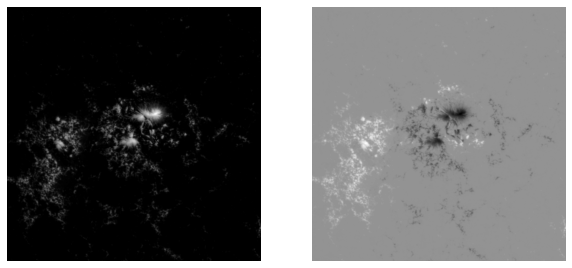

In [4]:
l='/home/zenalisa/data/train_list_50ar_210128_log10_abs.csv'
l=open(l).readlines()

print(l[1])
plt.figure(figsize=(10, 10))
aia=l[500].split(',')[1].strip().replace('/fs1/project/iip/', '/home/')
aiaimg=np.array(Image.open(aia))
plt.subplot(121)
plt.imshow(aiaimg, cmap='gray')
plt.axis('off')
aia_lin=aia.replace('/hmi_abs/', '/hmi/')
aialinimg=np.array(Image.open(aia_lin))
plt.subplot(122)
plt.imshow(aialinimg, cmap='gray')
plt.axis('off')

### 10AR

In [5]:
model_name='1hem_north'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

500
0


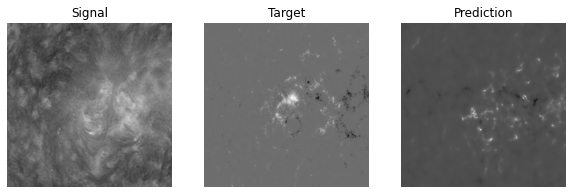

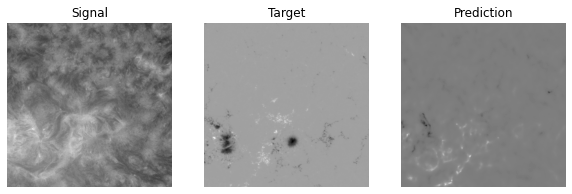

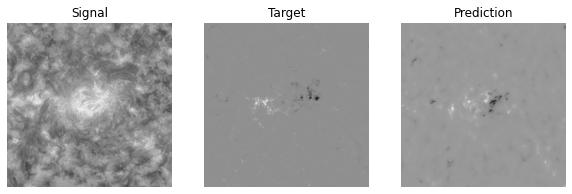

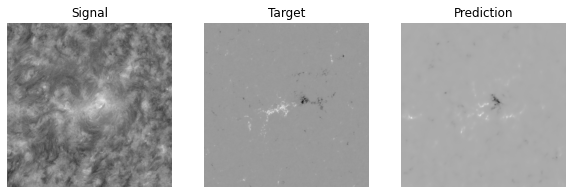

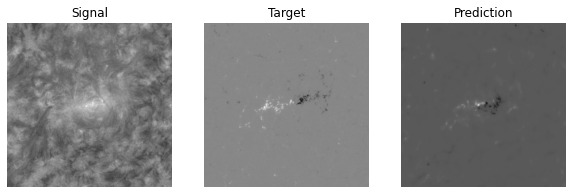

In [6]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    plot = r.display(signal, target, prediction)

/home/zenalisa/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/zenalisa/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/zenalisa/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


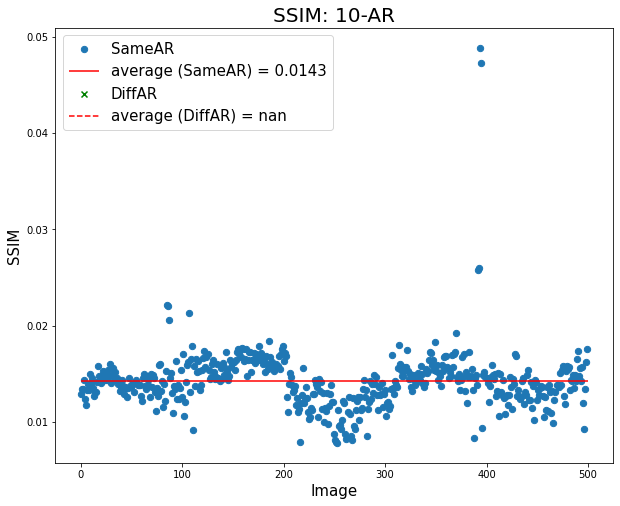

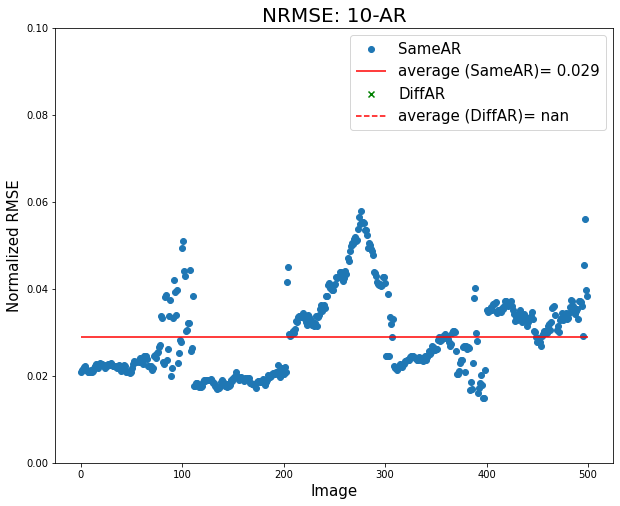

In [8]:
#mse and ssim plots
#og_csv1='/home/zenalisa/data/test_list_10ar_210302.csv'
#og_csv2='/home/zenalisa/data/test_list_50ar_210128_new_log10_abs.csv'
og_csv1='/home/zenalisa/data/test_list_1hem_210318log10.csv'
og_csv2='/home/zenalisa/data/test_list_50ar_210128_new_log10_abs.csv'

sname='10-AR'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


# 52-AR, abs

### log10 AIA

In [4]:
model_name='midscale_redo_log10_abs'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

498
500


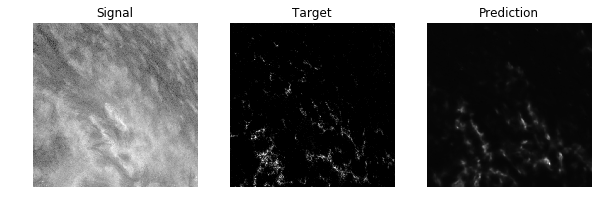

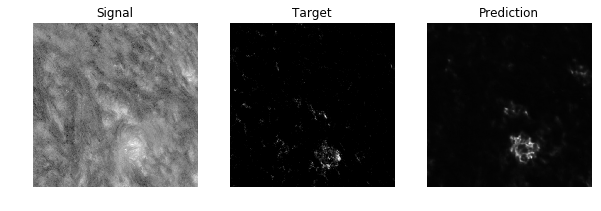

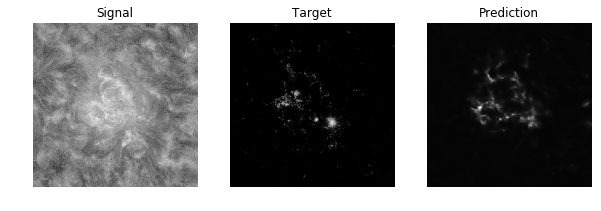

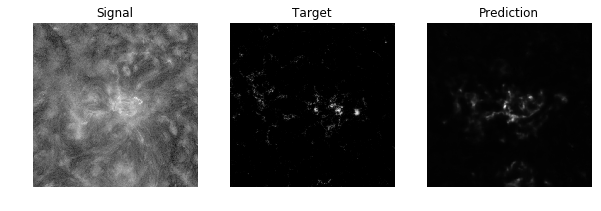

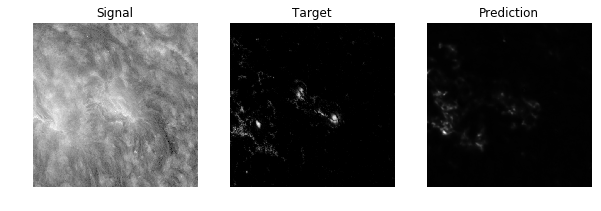

In [5]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

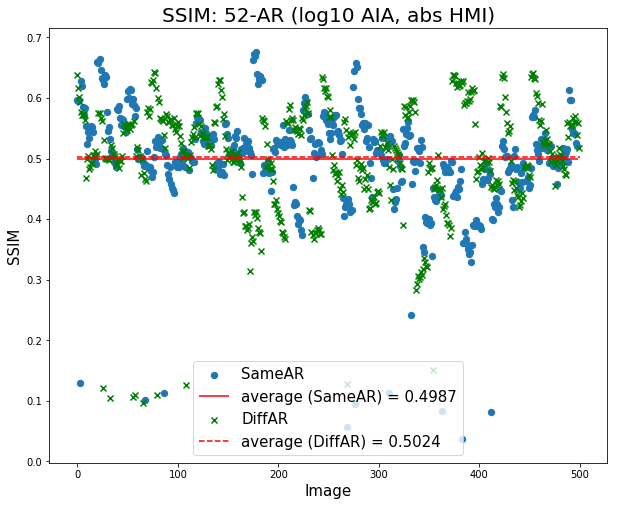

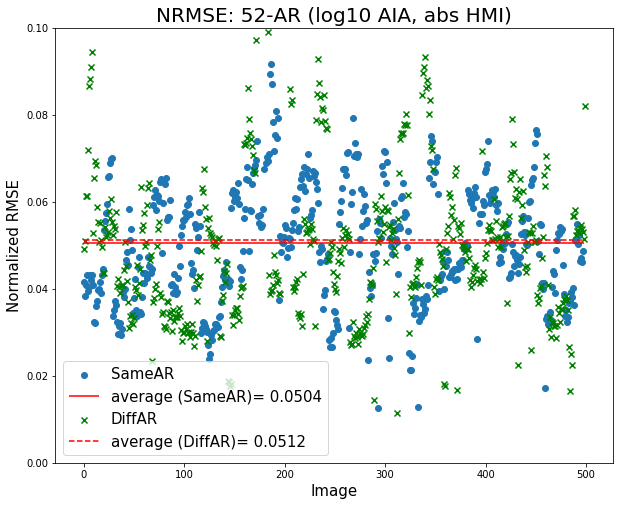

In [4]:
#target_path = '/home/zenalisa/data/output/190604_4/*/target.tiff'
#signal_path = '/home/zenalisa/data/output/190604_4/*/signal.tiff'
#prediction_path = '/home/zenalisa/data/output/190604_4/*/prediction_190604.tiff'
og_csv1='/home/zenalisa/data/test_list_50ar_210128_log10_abs.csv'
og_csv2='/home/zenalisa/data/50ar_last/lists/abs_lists/test_list_50ar_last_new_log10abs.csv'
#og_csv3='/home/zenalisa/data/test_list_south_only_neither.csv'

sname='52-AR (log10 AIA, abs HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


### linear AIA

In [5]:
model_name='midscale_redo_abs'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

498
500


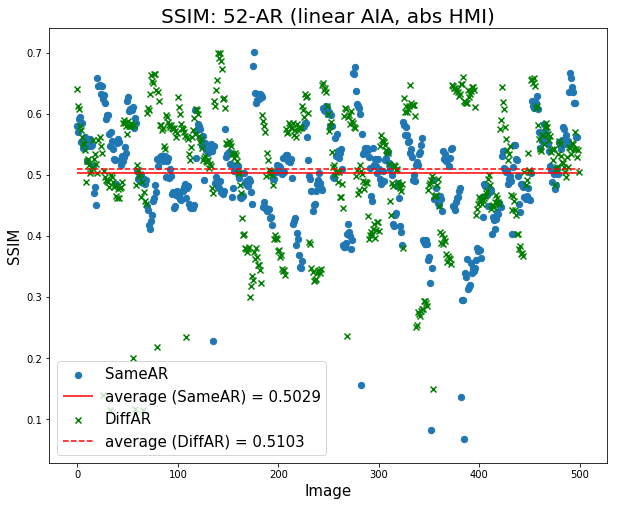

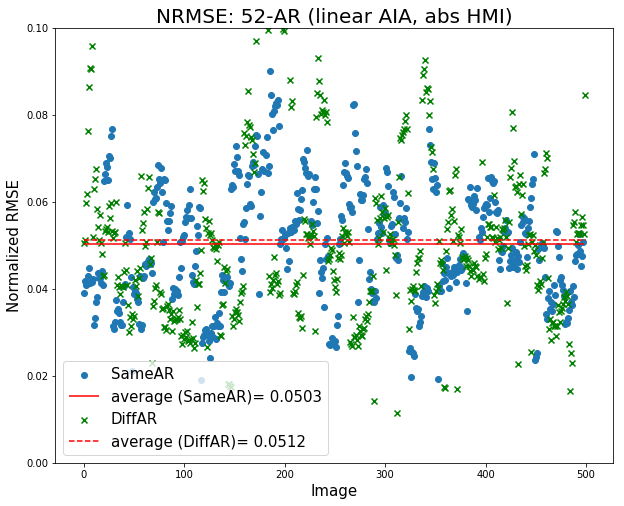

In [6]:
#og_csv1='/home/zenalisa/data/50ar_last/test_list_50ar_last_linabs.csv'
#og_csv2='/home/zenalisa/data/50ar/test_list_50ar_last_new_linabs.csv'
og_csv1='/home/zenalisa/data/test_list_10ar_210302.csv'
og_csv2='/home/zenalisa/data/test_list_50ar_210128_new_log10_abs.csv'

sname='52-AR (linear AIA, abs HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


# unbalanced

In [17]:
model_name='midscale_redo_log10'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

487
500


In [ ]:
og_csv1='/home/zenalisa/data/test_list_50ar_210128_log10.csv'
og_csv2='/home/zenalisa/data/test_list_50ar_210128_new_log10.csv'

sname='52-AR (log10 AIA, unbalanced HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


In [3]:
model_name='midscale_redo_neither'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

499
500


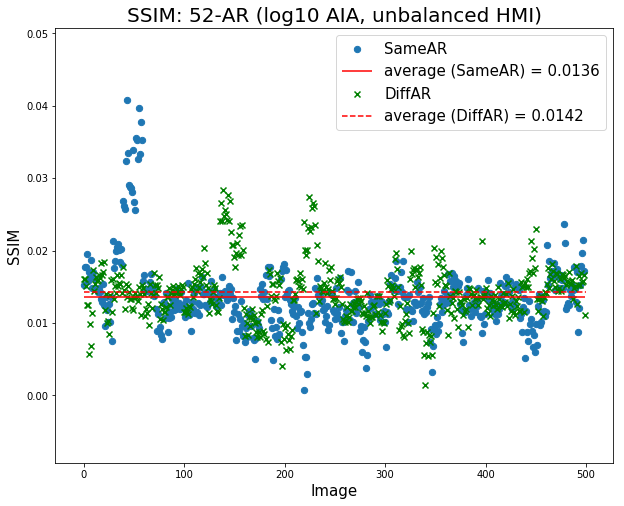

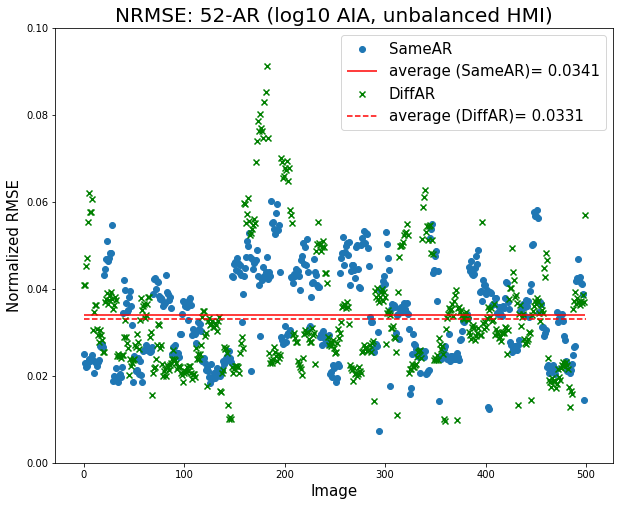

In [5]:
og_csv1='/home/zenalisa/data/test_list_50ar_210128.csv'
og_csv2='/home/zenalisa/data/test_list_50ar_210128_new.csv'

sname='52-AR (log10 AIA, unbalanced HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


# 52 AR, balanced signed HMI

### log10 AIA

In [3]:
model_name='midscale_redo_log10_rotate'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

487
500


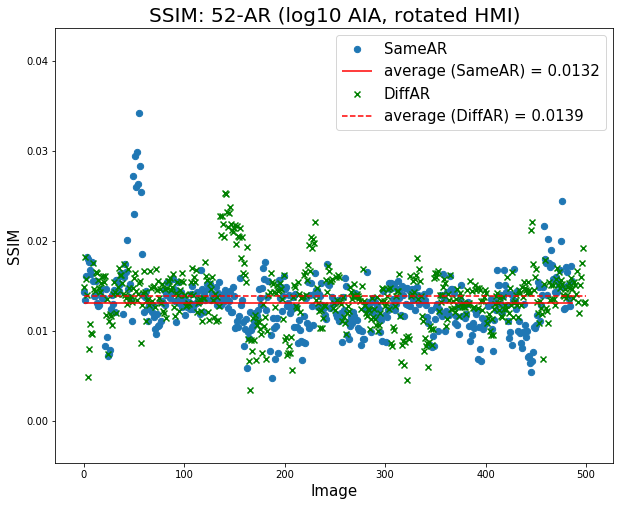

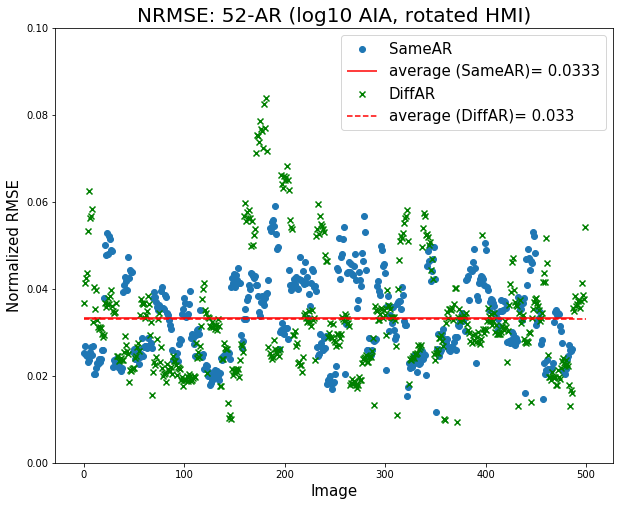

In [4]:
og_csv1='/home/zenalisa/data/rotate_lists/test_list_50ar_210128_log10_rotate.csv'
og_csv2='/home/zenalisa/data/rotate_lists/test_list_50ar_210128_new_log10_rotate.csv'

sname='52-AR (log10 AIA, rotated HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


### Linear AIA

In [5]:
model_name='midscale_redo_neither_rotate'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

499
500


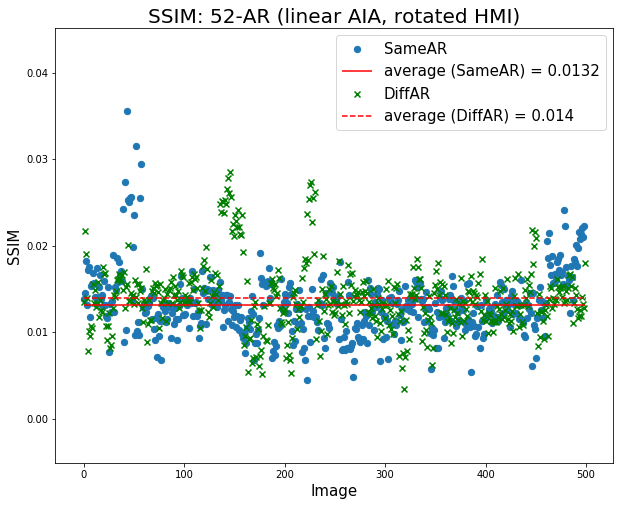

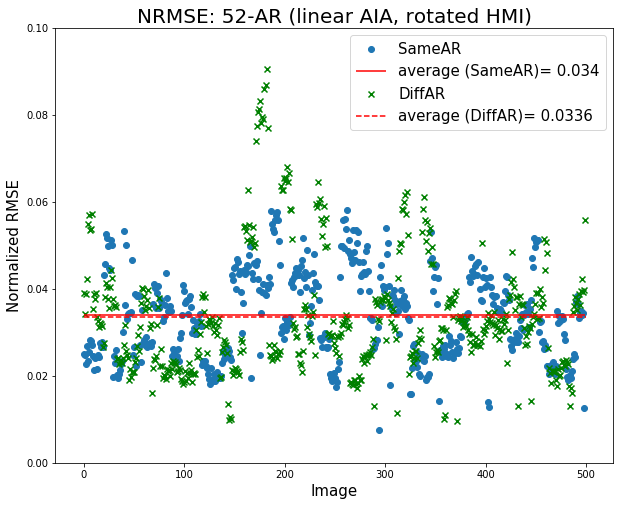

In [6]:
og_csv1='/home/zenalisa/data/rotate_lists/test_list_50ar_210128_rotate.csv'
og_csv2='/home/zenalisa/data/rotate_lists/test_list_50ar_210128_new_rotate.csv'

sname='52-AR (linear AIA, rotated HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


# 1-hemisphere HMI

### log10 AIA

In [13]:
model_name='1hem_log10'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)
signal_list3, target_list3, prediction_list3, signal_list_new3, target_list_new3, prediction_list_new3 = setupsouth(model_name)

500
500
500
0


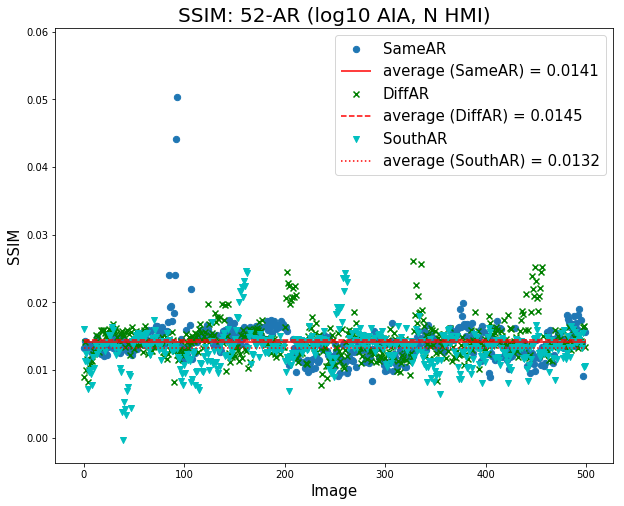

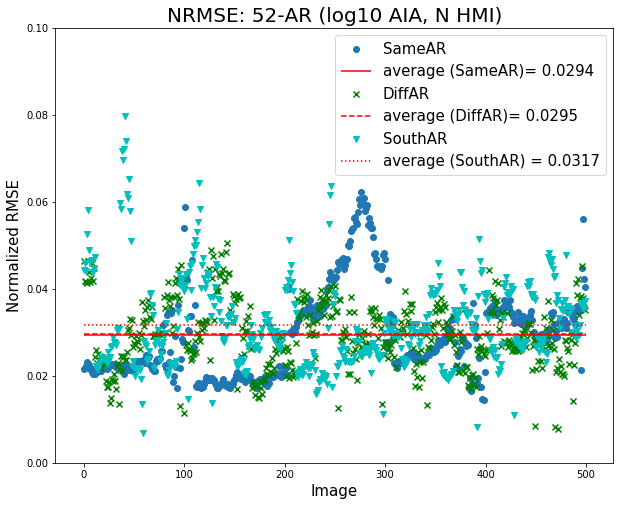

In [14]:
og_csv1='/home/zenalisa/data/test_list_1hem_210318log10.csv'
og_csv2='/home/zenalisa/data/test_list_1hem_210318log10_new.csv'
og_csv3='/home/zenalisa/data/test_list_south_only_log10.csv'

sname='52-AR (log10 AIA, N HMI)'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, target_list3=target_list3, prediction_list3=prediction_list3, og_target_csv3=og_csv3, simname=sname)


### linear AIA

In [25]:
model_name='1hem_neither'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)
signal_list3, target_list3, prediction_list3, signal_list_new3, target_list_new3, prediction_list_new3 = setupsouth(model_name)

500
497
0
0


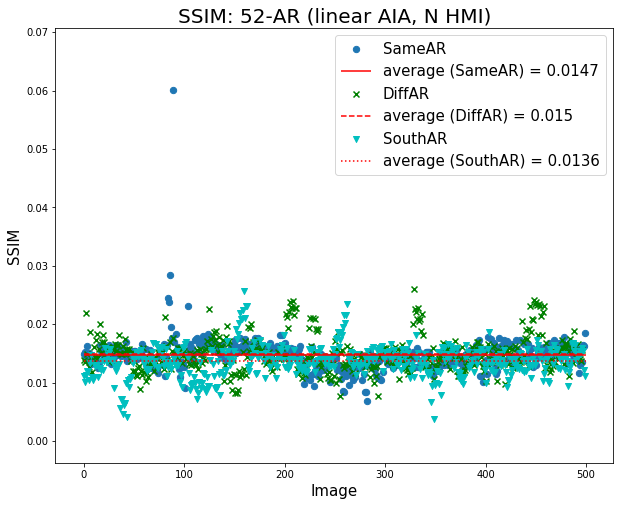

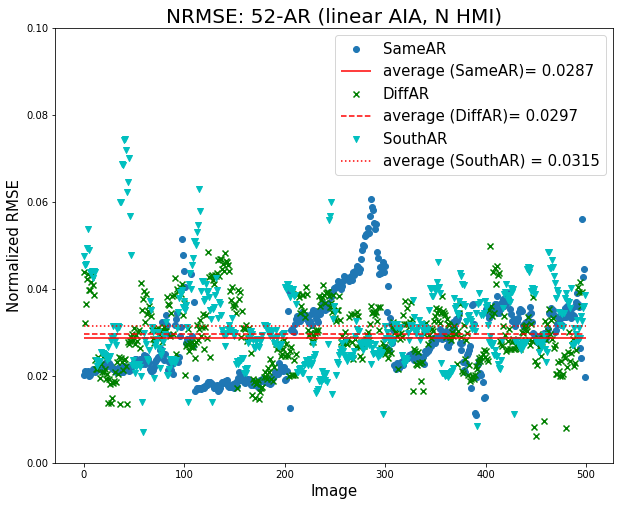

In [16]:
og_csv1='/home/zenalisa/data/test_list_1hem_210318neither.csv'
og_csv2='/home/zenalisa/data/test_list_1hem_210318neither_new.csv'
og_csv3='/home/zenalisa/data/test_list_south_only_neither.csv'

sname='52-AR (linear AIA, N HMI)'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, target_list3=target_list3, prediction_list3=prediction_list3, og_target_csv3=og_csv3, simname=sname)


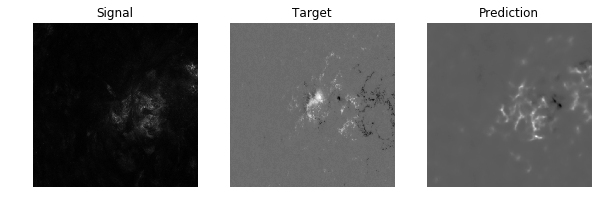

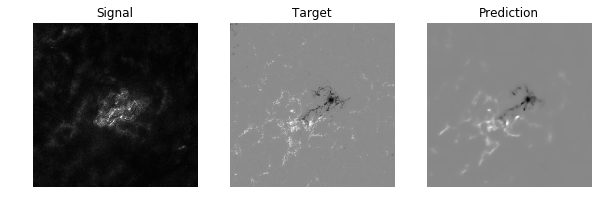

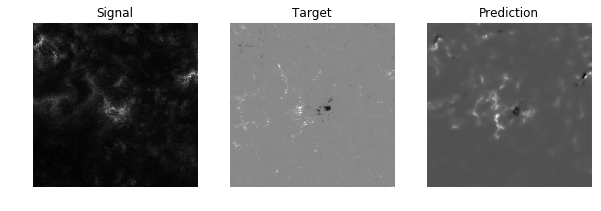

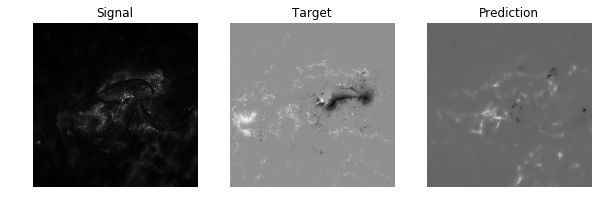

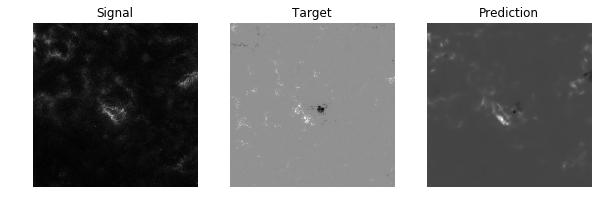

In [34]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    plot = r.display(signal, target, prediction)